# Data cleaning: handling missing data

This notebook is an abstraction of the Kaggle's 5-Day Challenge.

The **goal** of this exercise is to clean missing entries. 

The **evaluation** of the assignment will follow:

* Design process and thinking as a data engineer.
* Validation of knowledge on the different tools and steps throughout the process.
* Storytelling and visualisation of the insights.

Exercise **workflow**:

* Import dependencies & download dataset from [here](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/download).
* Explore missing data points and values.
* Assess the reason for the missing data points and values.
* Evaluate a method to drop the missing values.
* Evaluate a method to fill the missing values.
    
Notes:

* Write your code into the `TODO` cells.
* Feel free to choose how to present the results throughout the exercise, what libraries (e.g., seaborn, bokeh, etc.) and/or tools (e.g., PowerBI or Tableau).

## Preamble
________

In [ ]:
### just to inspect what we are about to install 
### most packages where installed automatically by missingno
#!cat ../requirements.txt 
!pip install -r ../requirements.txt 

In [2]:
import pandas as pd
import numpy as np

np.random.seed(0) 

import missingno as msno
import matplotlib.pyplot as plt

# This is just to make the presentation cleaner, but warnings need to be analyzed and fixed.
# But I dint have time for it. 
import warnings
warnings.filterwarnings('ignore')

%run functions.ipynb


# ------------------ PART 1: Ingestion and exploratory analysis -----------------

## Data
________

**TODO**

* Download the data from [here](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/download)
* Get some info regarding the dataframe (e.g., shape, dimensions, column names, etc.)

In [3]:
### REPLACE WITH YOUR PATH
BASE_PATH = '/home/matias/data/kaggle/NFL Play by Play 2009-2016/archive'

# Note that df3 and df4 seem to have the same schema. But not df5
df3 = build_df_from_csv('NFL Play by Play 2009-2016 (v3).csv', BASE_PATH, clean_headers = False) 
df4 = build_df_from_csv('NFL Play by Play 2009-2017 (v4).csv', BASE_PATH, clean_headers = False)
df5 = build_df_from_csv('NFL Play by Play 2009-2018 (v5).csv', BASE_PATH, clean_headers = False)

Reading: NFL Play by Play 2009-2016 (v3).csv
shape: (362447, 102)
columns: ['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety', 'Onsidekick', 'PuntResult', 'PlayType', 'Passer', 'Passer_ID', 'PassAttempt', 'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'QBHit', 'PassLocation', 'InterceptionThrown', 'Interceptor', 'Rusher', 'Rusher_ID', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver', 'Receiver_ID', 'Reception', 'ReturnResult', 'Returner', 'BlockingPlayer', 'Tackler1', 'Tackler2', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble', 'RecFumbTeam', 'RecFumbPlayer', 'Sack', 'Challenge.Replay', 'ChalReplayResult', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType', 'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScor

In [4]:
# We confirm that df3 and df4 have the same schema
compare_datasets_cols_and_dtypes(df3,df4)

exclusive_cols_from_first_df: set()

exclusive_cols_from_second_df: set()
         datatype_1 datatype_2
Date         object     object
GameID        int64      int64
Drive         int64      int64
qtr           int64      int64
down        float64    float64
...             ...        ...
Win_Prob    float64    float64
WPA         float64    float64
airWPA      float64    float64
yacWPA      float64    float64
Season        int64      int64

[102 rows x 2 columns]


In [5]:
# We concatanate them since they have the same schema
df34 = pd.concat([df3,df4], axis=0, ignore_index=True)
df34.head(3)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009


<AxesSubplot:>

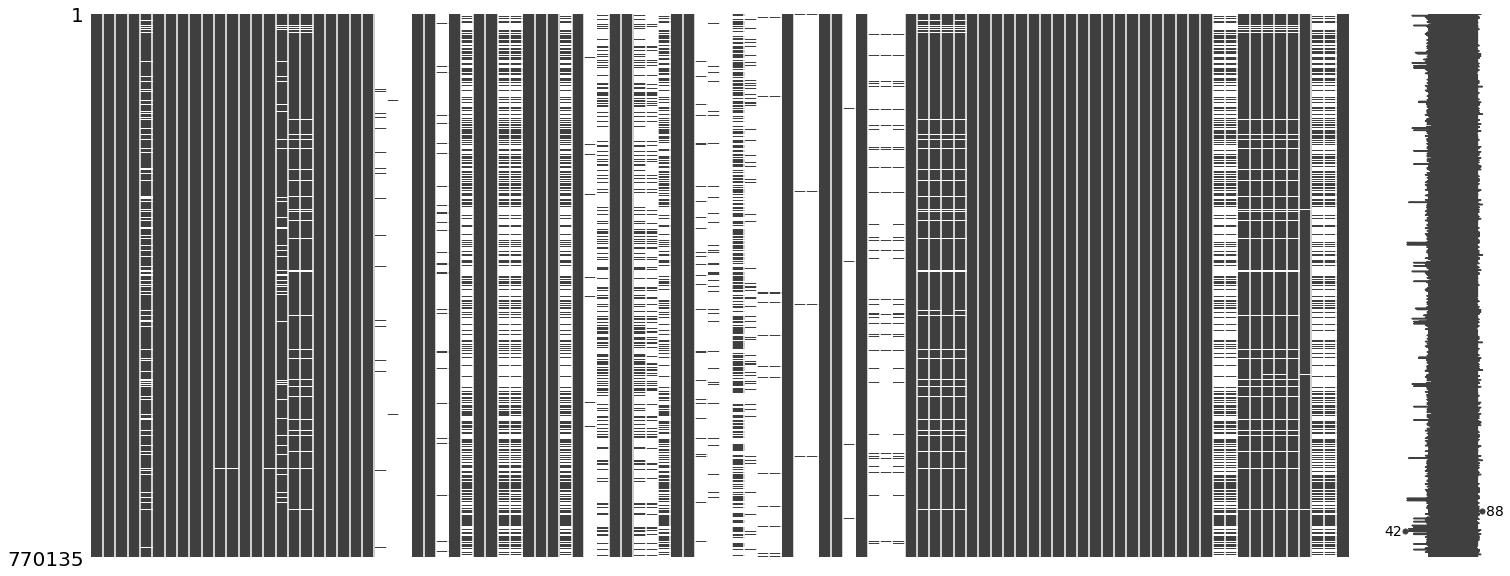

In [6]:
# Visualize how nulls are distributed
msno.matrix(df34)

<AxesSubplot:>

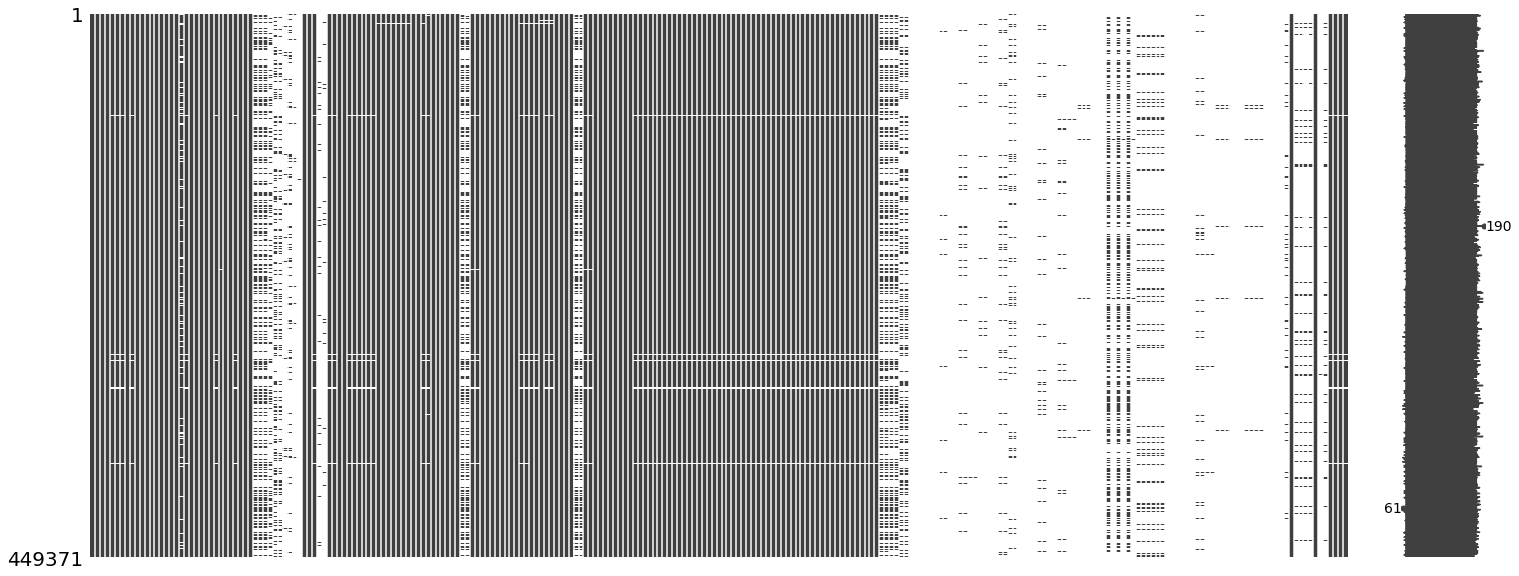

In [7]:
msno.matrix(df5)

## Exploration of missing data points and values
___

**TODO**

* How many missing values are there?
* What's the percentage of missing values?


In [8]:
print_stats_about_missing_values(df34, mode='all')

total_number_of_null_values: 19,532,953
total_number_of_filled_values: 59,020,817
total_number_of_values: 78,553,770
pc_number_of_null_values: 0.248657


In [9]:
print_stats_about_missing_values(df5, mode='all')

total_number_of_null_values: 44,121,484
total_number_of_filled_values: 70,468,121
total_number_of_values: 114,589,605
pc_number_of_null_values: 0.385039


**TODO**
* How many missing data points per column are there?

In [10]:
df34.isnull().sum() 

Date             0
GameID           0
Drive            0
qtr              0
down        115372
             ...  
Win_Prob     47002
WPA          10358
airWPA      469239
yacWPA      469718
Season           0
Length: 102, dtype: int64

In [1]:
df5.isnull().sum() 

NameError: name 'df5' is not defined

## Assessment of missing data points and values
____
 
**TODO**

* Look at the # of missing points in all nonzero columns sorted descending. 

In [11]:
print_number_of_missing_points_in_descending_order(df34)

DefTwoPoint         99.995066
BlockingPlayer      99.971044
TwoPointConv        99.852883
ChalReplayResult    99.172483
RecFumbTeam         98.921358
                      ...    
Fumble               0.000000
Sack                 0.000000
Challenge.Replay     0.000000
Accepted.Penalty     0.000000
Season               0.000000
Length: 102, dtype: float64

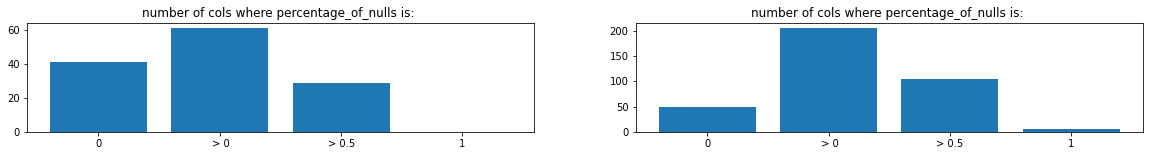

In [12]:
# df34 (left)
# A fair share of cols are totally solid (pc of nulls = 0)
# No col is totally empty (pc of nulls = 1)

# df5 (right)
# Few cols are totally solid 
# Even fewer are totally empty 

plot_and_compare_pc_of_nulls(df34, df5)

## Drop missing values
___

**TODO**

* Evaluate removing all rows with missing values


In [13]:
# Not sure if I understood this one correctly. But dropping all rows with at least one null is not 
# a good idea, both df34 and df5 reduces to zero rows, as shown below
df34.dropna(axis=0)  

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [14]:
df5.dropna(axis=0) 

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv


**TODO**
* Evaluate removing all columns with at least one missing value


In [15]:
# This makes more sense, since, after dropping, we have a solid df with 100% solid cols (41 and 50 respectevely)
# As we saw in the comparison above. 
remove_all_cols_with_at_least_one_missing_value(df34).shape

(770135, 41)

In [16]:
remove_all_cols_with_at_least_one_missing_value(df5).shape

(449371, 50)

**TODO**
* Compare the original dataframe and the filtered ones.

In [17]:
# df5:
# The original df contains many cols with NaN values. In particular, 5 cols contain only null values. 
# and thus should be discarded immediately, or filled somewhow. The method for filling depends on the nature of the column.
# For continous variables, where the records follow an order (for example timestamps, which can be sorted asc/desc) these can be
# filled with the avg(previous, next value)


# The rest of the cols, which contain some null values, might still be useful "as is"

## Fill in missing values
_____

**TODO**

* Select a subset of the dataset



In [18]:
# I pick df5 and make it leaner by dropping the unnecessary cols.  
df = remove_cols_with_only_null_values(df5)

The following cols contain only nulls and will be removed: ['lateral_sack_player_id', 'lateral_sack_player_name', 'assist_tackle_4_player_id', 'assist_tackle_4_player_name', 'assist_tackle_4_team']


**TODO**
* Evaluate replacing all NaNs with 0

In [19]:
# Doesnt make much sense since many of the cols are of type "object", and contain strings.   
# E.g. penalty_player_name, penalty_type, etc
# A better idea would be replacing NaN with a string, like "empty" or "no_data" or similar.  
df.fillna(0)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0


**TODO**

* Evaluate replacing all NaNs with the value of the next value in the same column


In [20]:
# This make sense for continous variables, and if the records are ordered. Not categorical variables.
# Example: filling a missing penalty_player_name with "E.Monroe" makes no sense at all, and will severely decrease the quality of the data,
# as this player will now have wrong data points associated with him.  
df.fillna(method='ffill').head(3)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


**TODO**
* Compare the original dataframe and the one with the filled NaNs

In [21]:
pd.set_option('display.max_columns', 250)
df.head(3)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,fumbled_1_

In [22]:
# as discussed, nulls should be replaced carefully, and only if it makes sense.
# In this dataset in particular, there are plenty of nulls, and for most cases it's probably better to work with leaner dfs. 
# See cmd 7, msno.matrix(df5) 

## Some data that should probably be discarded :
# 1. Rows with majority of nulls (e.g row 449370), unless the use case requieres the cols that are actually filled (E.g play_id, game_id, home_team, yardline_100)
# 2. A large portion of cols that contain a high number of nulls (all those towards the right side of the graph)


# Final comments:
# This dataset seems to include data from different entities, thus introducing lot of redundancy (which is good for fast analytical queries, 
# but mixes too many different things in one table). 
# For example, this table could be broken down in, say, three tables; PLAYERS, PLAYS, GAMES. 
# where the respective primary keys are player_id, play_id and game_id


# This would help keeping things more organised and lower redundancy on data, but joining them back to build the fact table can be slow. 